In [107]:
%matplotlib inline


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from matplotlib import pyplot
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



In [108]:
df_2020 = pd.read_csv("C:/Users/Toomas/Desktop/ITMI_Data/Cleaned_datasets_25_64/Yearly/2020_cleaned_weights.csv")

In [109]:
# drop columns that are irrelevant for analysis

df_2020 = df_2020.drop(columns=['survey_year', 'respondent_id', 'age','bmi','bmi_four_groups','bmi_two_groups_split30', 'weights'])

In [110]:
# create dummy variables
# first change values from numeric to nominal for readable dummy labels

df_2020['gender'] = df_2020['gender'].replace([1,2],['MALE','FEMALE'])
df_2020['age_group'] = df_2020['age_group'].replace([1,2,3,4],['25_34','35_44','45_54','55_64'])
df_2020['ethnicity_estonian_nonestonian'] = df_2020['ethnicity_estonian_nonestonian'].replace([1,2],['ESTONIAN','NON_ESTONIAN'])
df_2020['education'] = df_2020['education'].replace([1,2,3,4],['PRIMARY_BASIC','SECONARY','SECONDARY_VOCATIONAL','HIGHER'])
df_2020['income_per_household_member'] = df_2020['income_per_household_member'].replace([1,2,3,4],['QUARTILE_1','QUARTILE_2','QUARTILE_3','QUARTILE_4'])
df_2020['chronic_disease'] = df_2020['chronic_disease'].replace([1,2],['YES','NO'])
df_2020['smoking_history'] = df_2020['smoking_history'].replace([1,2,3,4],['NEVER','FORMERLY','SELDOM','DAILY'])
df_2020['alcohol_standard_units_consumption_frequency'] = df_2020['alcohol_standard_units_consumption_frequency'].replace([1,2,3,4,5],['NEVER','<1x_MONTH','1+x_MONTH','1x_WEEK','ALMOST_DAILY'])
df_2020['exercising_frequency'] = df_2020['exercising_frequency'].replace([1,2,3,4,5,6],['NEVER','1x_MONTH','2_3x_MONTH','1x_WEEK','2_3x_WEEK', '4_7X_WEEK'])
df_2020['work_physical_effort_level'] = df_2020['work_physical_effort_level'].replace([1,2,3,4],['LITTLE','SOME','AVERAGE','A_LOT'])


df_dummies = pd.get_dummies(df_2020, columns=['gender', 'age_group', \
                                              'ethnicity_estonian_nonestonian', 'education',\
                                              'income_per_household_member', 'chronic_disease',\
                                              'smoking_history',\
                                              'alcohol_standard_units_consumption_frequency',\
                                              'exercising_frequency',\
                                              'work_physical_effort_level'],drop_first=False)

In [111]:
# print out names of columns

df_dummies.columns

Index(['bmi_two_groups_split25', 'gender_FEMALE', 'gender_MALE',
       'age_group_25_34', 'age_group_35_44', 'age_group_45_54',
       'age_group_55_64', 'ethnicity_estonian_nonestonian_ESTONIAN',
       'ethnicity_estonian_nonestonian_NON_ESTONIAN', 'education_HIGHER',
       'education_PRIMARY_BASIC', 'education_SECONARY',
       'education_SECONDARY_VOCATIONAL',
       'income_per_household_member_QUARTILE_1',
       'income_per_household_member_QUARTILE_2',
       'income_per_household_member_QUARTILE_3',
       'income_per_household_member_QUARTILE_4', 'chronic_disease_NO',
       'chronic_disease_YES', 'smoking_history_DAILY',
       'smoking_history_FORMERLY', 'smoking_history_NEVER',
       'smoking_history_SELDOM',
       'alcohol_standard_units_consumption_frequency_1+x_MONTH',
       'alcohol_standard_units_consumption_frequency_1x_WEEK',
       'alcohol_standard_units_consumption_frequency_<1x_MONTH',
       'alcohol_standard_units_consumption_frequency_ALMOST_DAILY',
    

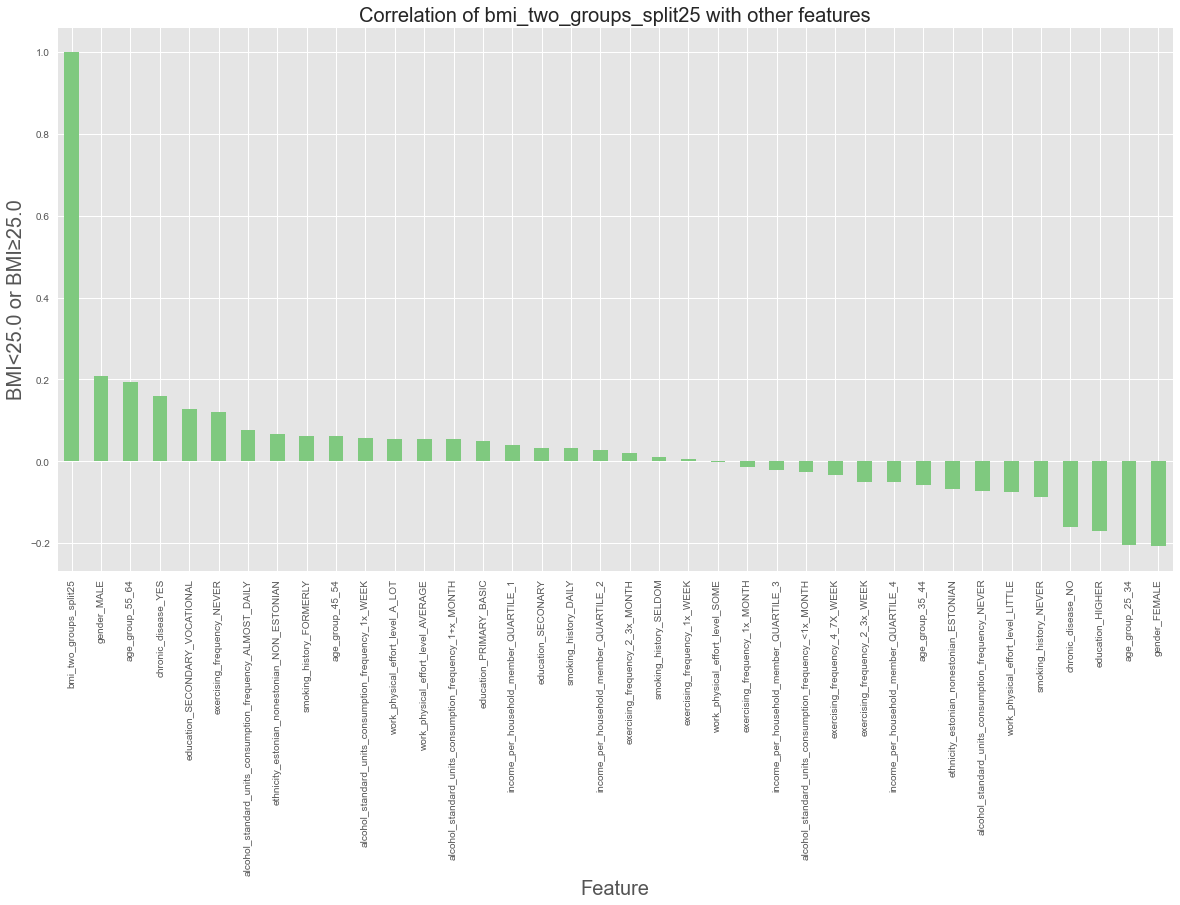

<Figure size 432x288 with 0 Axes>

In [112]:
## correlation graph

plt.style.use('ggplot')
plt.figure(figsize = (20,10))

# get a color map

my_cmap = cm.get_cmap('Accent')

# Get correlation of bmi_two_groups_split25 with other variables

df_dummies.corr()['bmi_two_groups_split25'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set title for figure, and labels x and y axes 

plt.title('Correlation of bmi_two_groups_split25 with other features', fontsize=20)
plt.xlabel('Feature', fontsize=20)
plt.ylabel('BMI<25.0 or BMI≥25.0', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/correlations.pdf")

In [113]:
# scaling all variables to the range of 0 to 1 before data learning process

y = df_dummies['bmi_two_groups_split25'].values
X = df_dummies.drop(columns = ['bmi_two_groups_split25'])

features = X.columns.values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [114]:
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [124]:
#====================================
# Logistic regression model training
#====================================

model_LR = LogisticRegression(random_state=1)
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [125]:
#print out the hyperparameters of the trained model
model_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [126]:
# LR model prediction and metrics
y_pred = model_LR.predict(X_test)

print('LR model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

LR model metrics:
Accuracy: 0.63
Precision: 	 0.61
Recall: 	 0.55
F1-score: 	 0.58


In [127]:
# LR model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_LR_1 = LogisticRegression(random_state=1)
scores1 = cross_val_score(model_LR_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_LR_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_LR_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_LR_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_LR_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.66
Precision: 0.64
Recall: 0.57
F1 Score: 0.60
AUC Score: 0.71


Feature: 0, Score: -0.41181
Feature: 1, Score: 0.41172
Feature: 2, Score: -0.77011
Feature: 3, Score: -0.19305
Feature: 4, Score: 0.16716
Feature: 5, Score: 0.79591
Feature: 6, Score: -0.13397
Feature: 7, Score: 0.13388
Feature: 8, Score: -0.40018
Feature: 9, Score: 0.19983
Feature: 10, Score: -0.04883
Feature: 11, Score: 0.24908
Feature: 12, Score: -0.12538
Feature: 13, Score: 0.06016
Feature: 14, Score: 0.04205
Feature: 15, Score: 0.02307
Feature: 16, Score: -0.19121
Feature: 17, Score: 0.19111
Feature: 18, Score: -0.26898
Feature: 19, Score: 0.17599
Feature: 20, Score: 0.02479
Feature: 21, Score: 0.06811
Feature: 22, Score: 0.15714
Feature: 23, Score: -0.13319
Feature: 24, Score: 0.00032
Feature: 25, Score: 0.26167
Feature: 26, Score: -0.28602
Feature: 27, Score: -0.09173
Feature: 28, Score: 0.01613
Feature: 29, Score: 0.18825
Feature: 30, Score: -0.14468
Feature: 31, Score: -0.20232
Feature: 32, Score: 0.23425
Feature: 33, Score: 0.00357
Feature: 34, Score: -0.27113
Feature: 35, Sc

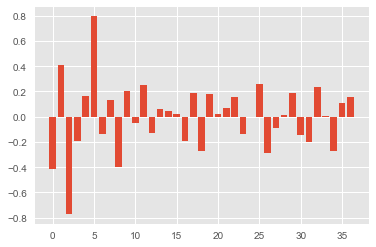

In [128]:
# get importance of features in LR model
importance = model_LR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


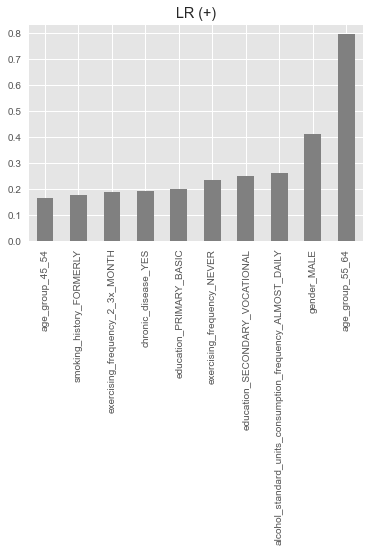

In [129]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in LR model 

weights = pd.Series(model_LR.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('LR (+)')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_most_BMI25.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


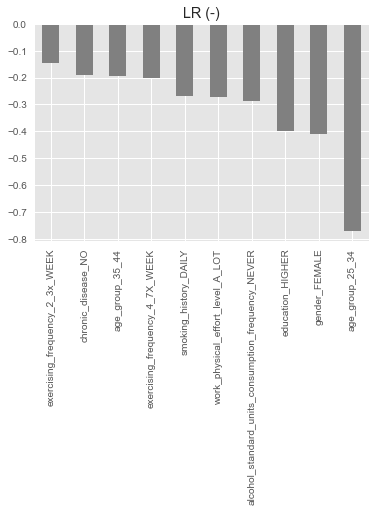

In [130]:
# the most negative impact / LR model
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar', color='grey'))
plt.title('LR (-)')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/LR_features_least_BMI25.pdf", bbox_inches='tight')

In [131]:
# roc curve for LR model

pred_prob1 = model_LR.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [132]:
# computing auc score for LR
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)


0.6831467764971602


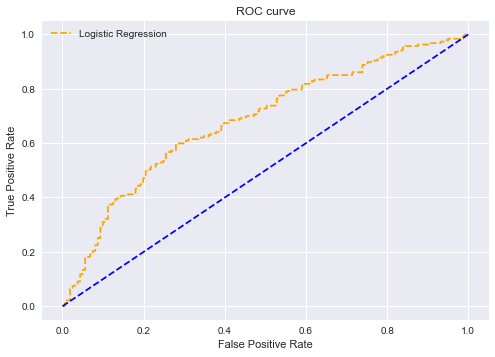

In [133]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_LR_BMI25.pdf")
plt.show();

In [134]:
#====================================
# Random Forest model training
#====================================

model_RF = RandomForestClassifier(random_state=1)

model_RF.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [135]:
#print out the hyperparameters of the trained model
model_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [136]:
# RF model prediction and metrics

y_pred = model_RF.predict(X_test)

print('RF model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

RF model metrics:
Accuracy: 0.61
Precision: 	 0.59
Recall: 	 0.53
F1-score: 	 0.56


In [137]:
# RF model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_RF_1 = RandomForestClassifier(random_state=1)
scores1 = cross_val_score(model_RF_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_RF_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_RF_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_RF_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_RF_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.63
Precision: 0.60
Recall: 0.54
F1 Score: 0.57
AUC Score: 0.66


Feature: 0, Score: 0.02792
Feature: 1, Score: 0.02463
Feature: 2, Score: 0.03968
Feature: 3, Score: 0.02910
Feature: 4, Score: 0.02890
Feature: 5, Score: 0.03904
Feature: 6, Score: 0.02516
Feature: 7, Score: 0.02522
Feature: 8, Score: 0.03033
Feature: 9, Score: 0.01783
Feature: 10, Score: 0.02388
Feature: 11, Score: 0.02579
Feature: 12, Score: 0.02917
Feature: 13, Score: 0.03526
Feature: 14, Score: 0.03141
Feature: 15, Score: 0.02776
Feature: 16, Score: 0.02613
Feature: 17, Score: 0.02336
Feature: 18, Score: 0.02595
Feature: 19, Score: 0.03144
Feature: 20, Score: 0.03278
Feature: 21, Score: 0.01458
Feature: 22, Score: 0.01720
Feature: 23, Score: 0.01249
Feature: 24, Score: 0.02926
Feature: 25, Score: 0.01256
Feature: 26, Score: 0.03130
Feature: 27, Score: 0.03650
Feature: 28, Score: 0.02820
Feature: 29, Score: 0.02038
Feature: 30, Score: 0.03526
Feature: 31, Score: 0.03243
Feature: 32, Score: 0.01687
Feature: 33, Score: 0.02934
Feature: 34, Score: 0.01510
Feature: 35, Score: 0.03452
Fe

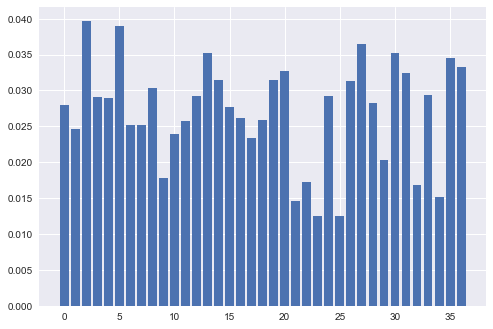

In [138]:
importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


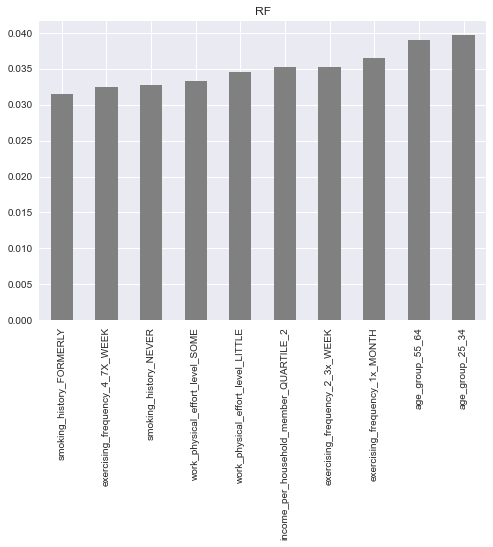

In [139]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in RF model 

weights = pd.Series(model_RF.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('RF')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_most_BMI25.pdf", bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


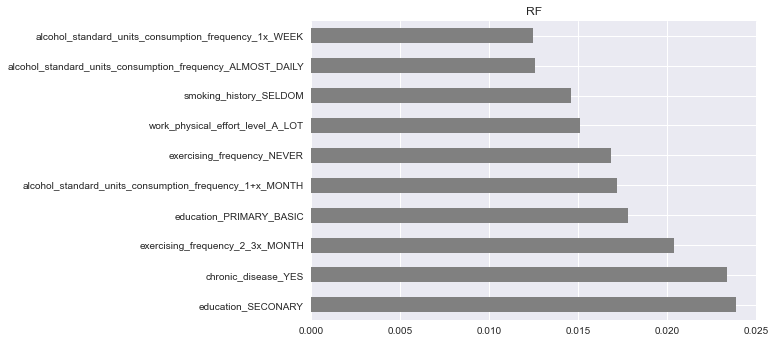

In [140]:
# the least impact / RF model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.title('RF')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/RF_features_least_BMI25.pdf",bbox_inches='tight')

In [141]:
# roc curve for RF model

pred_prob2 = model_RF.predict_proba(X_test)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [142]:
# computing auc score for RF
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print(auc_score2)

0.6281263493539708


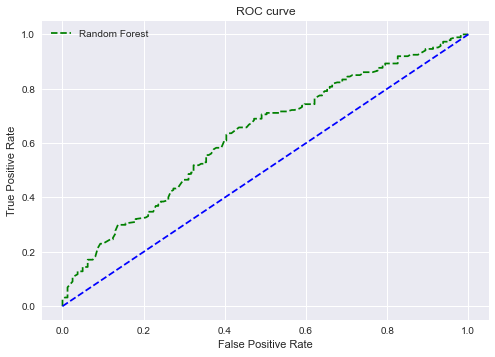

In [143]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_RF_BMI25.pdf")
plt.show();

In [144]:
#====================================
# SVM model training
#====================================

model_SVM=SVC(probability = True, kernel ='linear', random_state=1) 
model_SVM.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [145]:
#print out the hyperparameters of the trained model
model_SVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': True,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [146]:
# SVM model prediction and metrics

y_pred = model_SVM.predict(X_test)

print('SVM model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))


SVM model metrics:
Accuracy: 0.63
Precision: 	 0.60
Recall: 	 0.57
F1-score: 	 0.58


In [147]:
# SVM model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_SVM_1 = SVC(probability = True, kernel ='linear', random_state=1)
scores1 = cross_val_score(model_SVM_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_SVM_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_SVM_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_SVM_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_SVM_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.65
Precision: 0.63
Recall: 0.55
F1 Score: 0.59
AUC Score: 0.70


AxesSubplot(0.125,0.125;0.775x0.755)


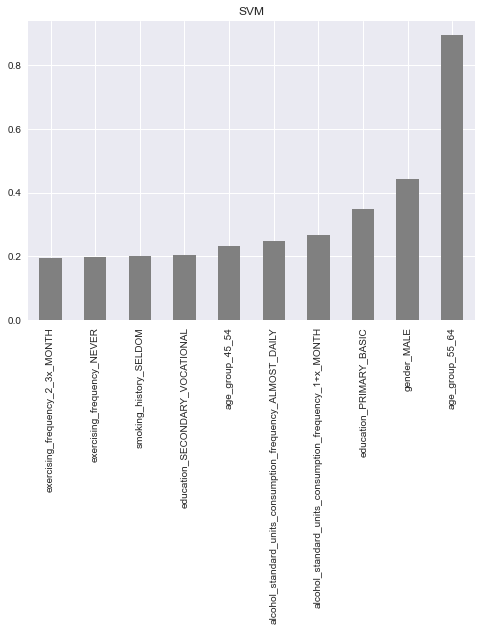

In [148]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in SVM model 

weights = pd.Series(model_SVM.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('SVM')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_most_BMI25.pdf",bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


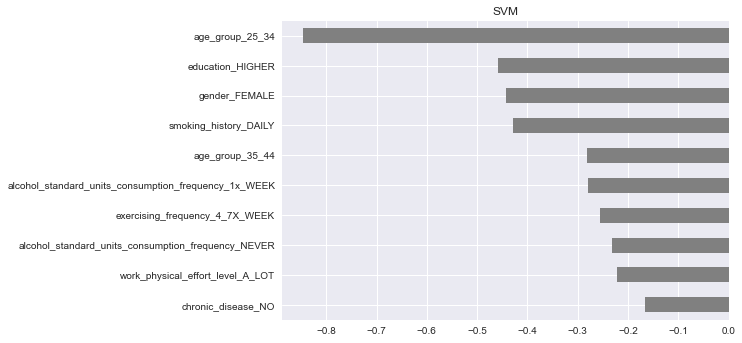

In [149]:
# the most negative impact / SVM model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.title('SVM')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/SVM_features_least_BMI25.pdf",bbox_inches='tight')

In [150]:
# roc curve for SVM model

pred_prob3 = model_SVM.predict_proba(X_test)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [151]:
# computing auc score for SVM
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
print(auc_score3)

0.6752748530242136


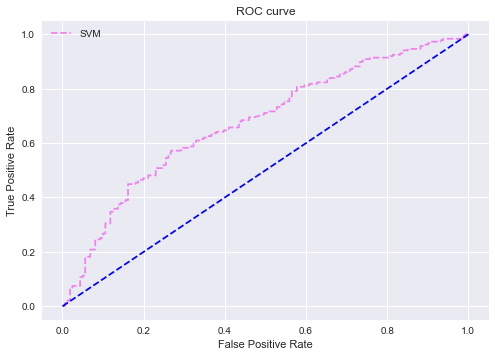

In [152]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='SVM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_SVM_BMI25.pdf")
plt.show();

In [153]:
#====================================
# Decision Tree model training
#====================================

model_DT = DecisionTreeClassifier(random_state=1)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [154]:
#print out the hyperparameters of the trained model
model_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [155]:
y_pred = model_DT.predict(X_test)

print('DT model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

DT model metrics:
Accuracy: 0.57
Precision: 	 0.53
Recall: 	 0.53
F1-score: 	 0.53


In [156]:
# DT model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_DT_1 = DecisionTreeClassifier(random_state=1)
scores1 = cross_val_score(model_DT_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_DT_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_DT_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_DT_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_DT_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.57
Precision: 0.52
Recall: 0.54
F1 Score: 0.53
AUC Score: 0.56


Feature: 0, Score: 0.03446
Feature: 1, Score: 0.01052
Feature: 2, Score: 0.04852
Feature: 3, Score: 0.04453
Feature: 4, Score: 0.01005
Feature: 5, Score: 0.01360
Feature: 6, Score: 0.02423
Feature: 7, Score: 0.02547
Feature: 8, Score: 0.02727
Feature: 9, Score: 0.01480
Feature: 10, Score: 0.02155
Feature: 11, Score: 0.01811
Feature: 12, Score: 0.02638
Feature: 13, Score: 0.03435
Feature: 14, Score: 0.04176
Feature: 15, Score: 0.02293
Feature: 16, Score: 0.03098
Feature: 17, Score: 0.02298
Feature: 18, Score: 0.02729
Feature: 19, Score: 0.03411
Feature: 20, Score: 0.02470
Feature: 21, Score: 0.02568
Feature: 22, Score: 0.01972
Feature: 23, Score: 0.01480
Feature: 24, Score: 0.03370
Feature: 25, Score: 0.01749
Feature: 26, Score: 0.03585
Feature: 27, Score: 0.02645
Feature: 28, Score: 0.02949
Feature: 29, Score: 0.02385
Feature: 30, Score: 0.02911
Feature: 31, Score: 0.04882
Feature: 32, Score: 0.01655
Feature: 33, Score: 0.04055
Feature: 34, Score: 0.01430
Feature: 35, Score: 0.03464
Fe

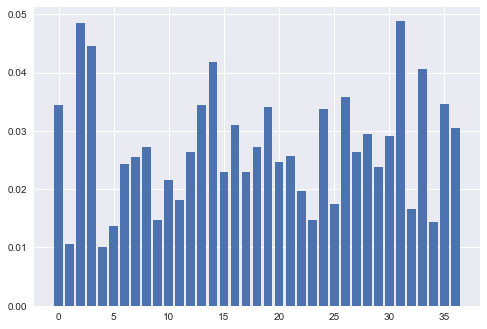

In [157]:
# plot feature important of DT model
importance = model_DT.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AxesSubplot(0.125,0.125;0.775x0.755)


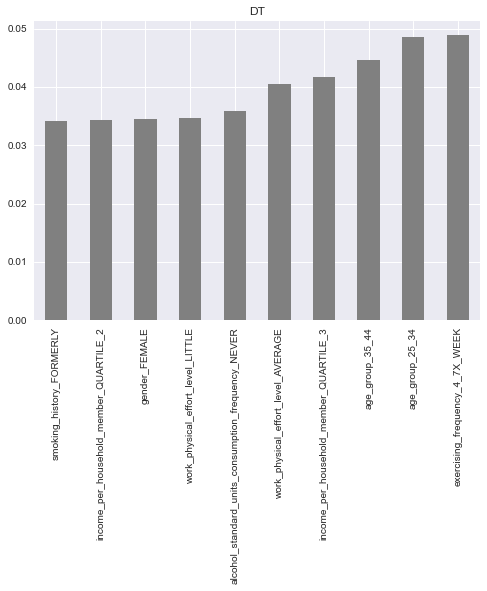

In [214]:
# getting the weights of 10 most important variables affecting BMI≥25.0 in DT model 

weights = pd.Series(model_DT.feature_importances_, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('DT')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI25.pdf",bbox_inches='tight')

AxesSubplot(0.125,0.125;0.775x0.755)


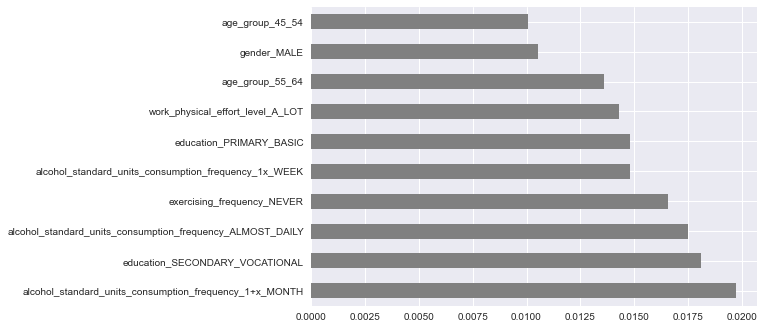

In [159]:
# the most negative impact / DT model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_least_BMI25.pdf",bbox_inches='tight')

In [160]:
# roc curve for DT model

pred_prob4 = model_DT.predict_proba(X_test)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [161]:
# computing auc score for DT
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score4)

0.5656491845750157


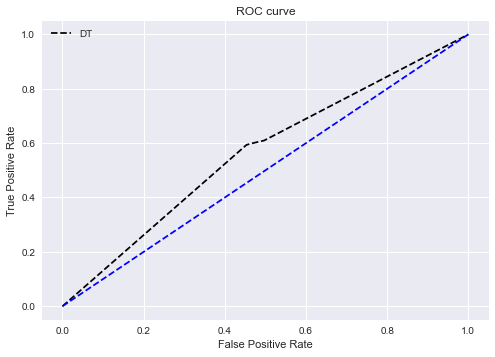

In [162]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr4, fpr4, linestyle='--',color='black', label='DT')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_DT_BMI25.pdf")
plt.show();

In [164]:
#====================================
# Gaussian Naive Bayes model training
#====================================

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [165]:
#print out the hyperparameters of the trained model
model_NB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [166]:
y_pred = model_NB.predict(X_test)

print('NB model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

NB model metrics:
Accuracy: 0.66
Precision: 	 0.62
Recall: 	 0.69
F1-score: 	 0.65


In [167]:
# NB model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_NB_1 = GaussianNB()
scores1 = cross_val_score(model_NB_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_NB_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_NB_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_NB_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_NB_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.63
Precision: 0.57
Recall: 0.69
F1 Score: 0.63
AUC Score: 0.69


In [168]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(model_NB, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. alcohol_standard_units_consumption_frequency_1x_WEEK (0.024138)
2. exercising_frequency_NEVER (0.014943)
3. chronic_disease_YES (0.011494)
4. alcohol_standard_units_consumption_frequency_ALMOST_DAILY (0.011494)
5. chronic_disease_NO (0.011494)
6. education_HIGHER (0.010920)
7. age_group_25_34 (0.010345)
8. gender_FEMALE (0.009770)
9. education_SECONARY (0.009770)
10. gender_MALE (0.009770)
11. age_group_55_64 (0.009195)
12. work_physical_effort_level_AVERAGE (0.008621)
13. exercising_frequency_2_3x_WEEK (0.006322)
14. alcohol_standard_units_consumption_frequency_NEVER (0.005747)
15. income_per_household_member_QUARTILE_3 (0.004598)
16. age_group_45_54 (0.004023)
17. age_group_35_44 (0.003448)
18. smoking_history_NEVER (0.002299)
19. smoking_history_SELDOM (0.002299)
20. exercising_frequency_2_3x_MONTH (0.002299)
21. alcohol_standard_units_consumption_frequency_<1x_MONTH (0.002299)
22. exercising_frequency_4_7X_WEEK (0.002299)
23. smoking_history_FORMERLY (0.001724)


AxesSubplot(0.125,0.125;0.775x0.755)


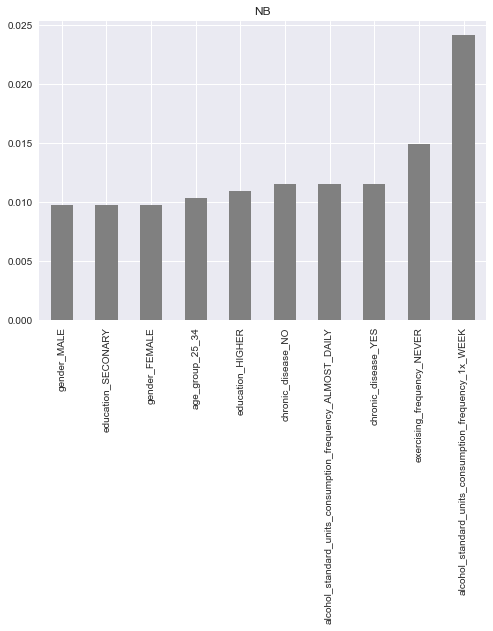

In [169]:
# greatest impact / NB model

weights = pd.Series(importances, index = X.columns.values)
print(weights.sort_values(ascending=True)[-10:].plot(kind='bar', color='grey'))
plt.title('NB')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/NB_features_most_BMI25.pdf",bbox_inches='tight')


AxesSubplot(0.125,0.125;0.775x0.755)


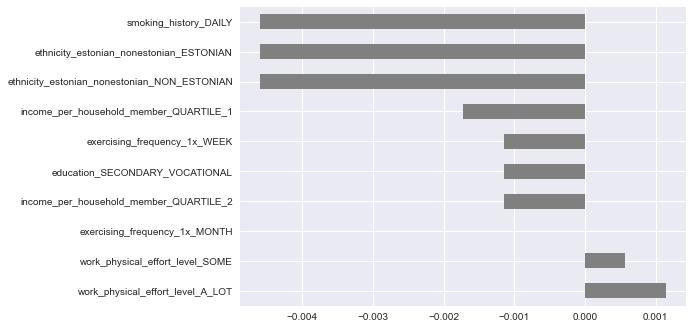

In [170]:
# smalles impact / NB model
print(weights.sort_values(ascending=False)[-10:].plot(kind='barh', color='grey'))
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/DT_features_most_BMI25.pdf",bbox_inches='tight')

In [171]:
# roc curve for NB model

pred_prob5 = model_NB.predict_proba(X_test)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [172]:
# computing auc score for NB
auc_score5 = roc_auc_score(y_test, pred_prob5[:,1])
print(auc_score5)

0.7056000265718936


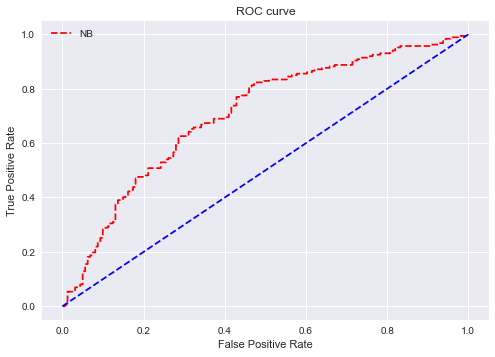

In [173]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='NB')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_NB_BMI25.pdf")
plt.show();

In [201]:
#====================================
# KNN model training
#====================================

# testing accuracy for k from 1 to 40
k_range = range(1,41)
scores={}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing accuracy')

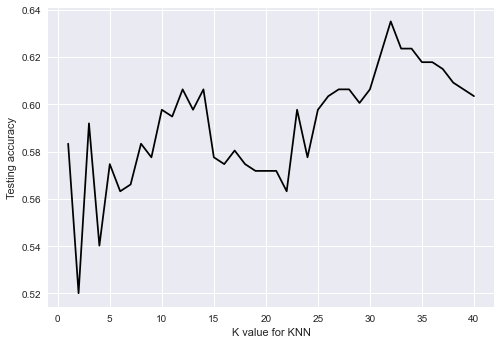

In [202]:
#plotting the relationship between k values and correspondgin testing accuracy

plt.plot(k_range,scores_list, color='black')
plt.xlabel('K value for KNN')
plt.ylabel('Testing accuracy')

In [203]:
# k=31, as 31 is the odd number that provides best testing accuracy
model_KNN = KNeighborsClassifier(n_neighbors=31)
model_KNN.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=31)

In [204]:
#print out the hyperparameters of the trained model
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 31,
 'p': 2,
 'weights': 'uniform'}

In [205]:
y_pred = model_KNN.predict(X_test)

print('KNN model metrics:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: \t {0:.2f}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: \t {0:.2f}'.format(metrics.recall_score(y_test, y_pred)))
print('F1-score: \t {0:.2f}'.format(metrics.f1_score(y_test, y_pred)))

KNN model metrics:
Accuracy: 0.62
Precision: 	 0.59
Recall: 	 0.57
F1-score: 	 0.58


In [206]:
# KNN model performance with K-folds validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model_KNN_1 = KNeighborsClassifier()
scores1 = cross_val_score(model_KNN_1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model_KNN_1, X, y, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model_KNN_1, X, y, scoring='recall', cv=cv, n_jobs=-1)
scores4 = cross_val_score(model_KNN_1, X, y, scoring='f1', cv=cv, n_jobs=-1)
scores5 = cross_val_score(model_KNN_1, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Accuracy: %.2f' % (mean(scores1)))
print('Precision: %.2f' % (mean(scores2)))
print('Recall: %.2f' % (mean(scores3)))
print('F1 Score: %.2f' % (mean(scores4)))
print('AUC Score: %.2f' % (mean(scores5)))

Accuracy: 0.59
Precision: 0.55
Recall: 0.54
F1 Score: 0.54
AUC Score: 0.62


In [207]:
# feature importance is not defined for the KNN classification algorithm and there is no easy way to calucate it

In [208]:
# roc curve for KNN model

pred_prob6 = model_KNN.predict_proba(X_test)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [209]:
# computing auc score for KNN
auc_score6 = roc_auc_score(y_test, pred_prob6[:,1])
print(auc_score6)

0.6400670940312884


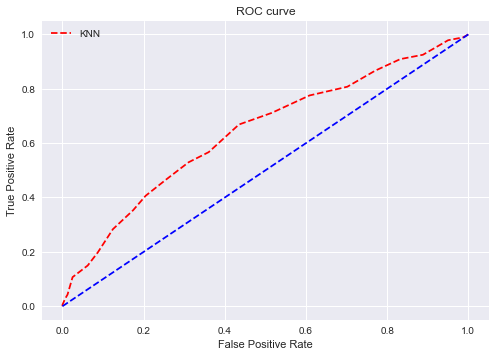

In [210]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr6, fpr6, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_KNN_BMI25.pdf")
plt.show();

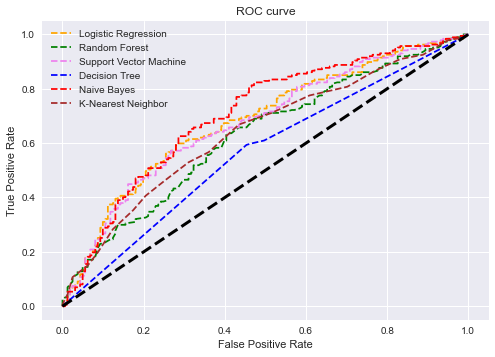

In [212]:
# a plot of roc curves of all 6 models
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='violet', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='--',color='blue', label='Decision Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='red', label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='--',color='brown', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BMI25.pdf")
plt.show();

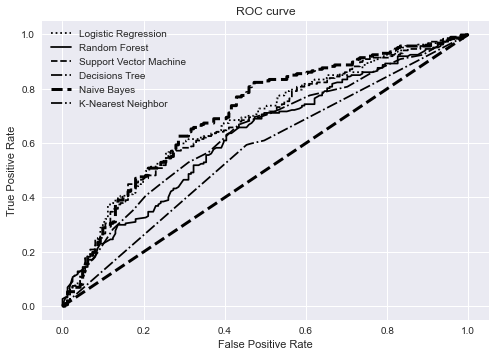

In [213]:
# a plot of roc curves of all 6 models / black and white
plt.style.use('seaborn')

# plot roc curves
plt.plot(tpr1, fpr1, linestyle=':',color = 'black',label='Logistic Regression')
plt.plot(tpr2, fpr2, linestyle='-',color='black', label='Random Forest')
plt.plot(tpr3, fpr3, linestyle='--',color='black', label='Support Vector Machine')
plt.plot(tpr4, fpr4, linestyle='-.',color='black', label='Decisions Tree')
plt.plot(tpr5, fpr5, linestyle='--',color='black', linewidth=3, label='Naive Bayes')
plt.plot(tpr6, fpr6, linestyle='-.',color='black', label='K-Nearest Neighbor')

plt.plot(p_fpr, p_tpr, linestyle='--', color='black', linewidth=3)
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive Rate')

plt.legend(loc='best')
plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/ML/ROC_curve_all6_BW_BMI25.pdf")
plt.show();